In [1]:
import sys
sys.path.append('/opt/code/face/dual_shot')
import numpy as np
import collections
from prepare_data.generator import gen_data
from prepare_data.model_target import init_anchors
from dual_conf import current_config as conf
from prepare_data.generator import image_reader,layer_strides,map_size,e_scale,ratio

Using TensorFlow backend.
/root/anaconda3/envs/keras/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/root/anaconda3/envs/keras/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
gen = gen_data(conf.batch_size, 'train')
print([i.shape for i in next(gen)[0]])
[batch_img, e_reg_targets, e_cls_targets, o_reg_targets, o_cls_targets], []= next(gen)

Error bbox number to filter : 48,  bbox number: 159376
[(4, 640, 640, 3), (4, 34125, 4), (4, 34125), (4, 34125, 4), (4, 34125)]


In [3]:
count = [np.unique(e_cls_targets,return_counts=True) for i in range(len(e_cls_targets)) ]
print(count)

[(array([-1,  0,  1]), array([136310,    133,     57])), (array([-1,  0,  1]), array([136310,    133,     57])), (array([-1,  0,  1]), array([136310,    133,     57])), (array([-1,  0,  1]), array([136310,    133,     57]))]


## plot augmented image

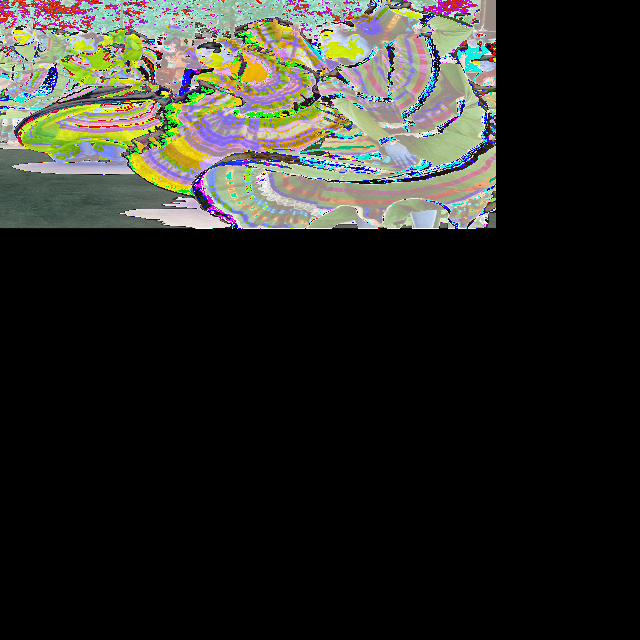

In [4]:
from PIL import Image
Image.fromarray(batch_img[0].astype('uint8'))

In [5]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
def plot_anchor(img_array, anchor_list):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(1, 1, 1)
    ax.imshow(img_array.astype(int))
    for a in anchor_list:
        y1,x1,y2,x2 = [int(i) for i in a]
        rect = patches.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
    plt.show()

## plot postive anchor

In [6]:
e_anchors = init_anchors(layer_strides, map_size, ratio, e_scale)
e_anchors.shape

(34125, 4)

In [7]:
e_cls_targets = e_cls_targets[0]
e_cls_targets.shape

(34125,)

In [8]:
pos_an_ind = np.where(e_cls_targets==1)
pos_an_ind

(array([  682,  1125,  1171,  1282,  1284,  1285,  1286,  1444,  1445,
         1446,  1458,  1459,  1460,  1481,  1483,  1558,  1618,  1619,
         1620,  1650,  1778,  1779,  1780,  2291,  2292,  2293,  2294,
         2521, 25961, 26041, 26042, 26106, 26121, 26122, 26186, 26266]),)

In [9]:
anchor_list = e_anchors[pos_an_ind]
print(len(anchor_list))
anchor_list

36


array([[  8.20204103, 163.46802735,  27.79795897, 176.53197265],
       [ 20.20204103,  15.46802735,  39.79795897,  28.53197265],
       [ 20.20204103, 199.46802735,  39.79795897, 212.53197265],
       [ 24.20204103,   3.46802735,  43.79795897,  16.53197265],
       [ 24.20204103,  11.46802735,  43.79795897,  24.53197265],
       [ 24.20204103,  15.46802735,  43.79795897,  28.53197265],
       [ 24.20204103,  19.46802735,  43.79795897,  32.53197265],
       [ 28.20204103,  11.46802735,  47.79795897,  24.53197265],
       [ 28.20204103,  15.46802735,  47.79795897,  28.53197265],
       [ 28.20204103,  19.46802735,  47.79795897,  32.53197265],
       [ 28.20204103,  67.46802735,  47.79795897,  80.53197265],
       [ 28.20204103,  71.46802735,  47.79795897,  84.53197265],
       [ 28.20204103,  75.46802735,  47.79795897,  88.53197265],
       [ 28.20204103, 159.46802735,  47.79795897, 172.53197265],
       [ 28.20204103, 167.46802735,  47.79795897, 180.53197265],
       [ 28.20204103, 467

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


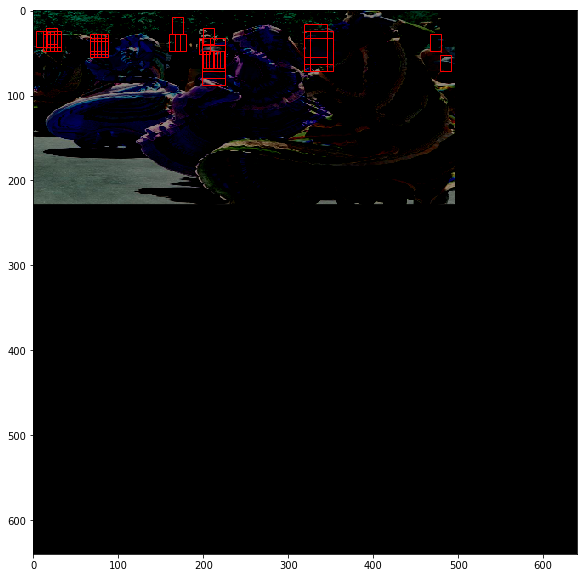

In [10]:
plot_anchor( batch_img[0], anchor_list)

## plot negtive anchor

In [11]:
neg_an_ind  = np.where(e_cls_targets==-1)
neg_an_ind

(array([    0,     1,     2, ..., 34122, 34123, 34124]),)

In [12]:
anchor_list = e_anchors[neg_an_ind]
print(len(anchor_list))
anchor_list

34049


array([[  0.        ,   0.        ,  11.79795897,   8.53197265],
       [  0.        ,   0.        ,  11.79795897,  12.53197265],
       [  0.        ,   3.46802735,  11.79795897,  16.53197265],
       ...,
       [262.46531292, 110.97687528, 640.        , 529.02312472],
       [262.46531292, 238.97687528, 640.        , 640.        ],
       [262.46531292, 366.97687528, 640.        , 640.        ]])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


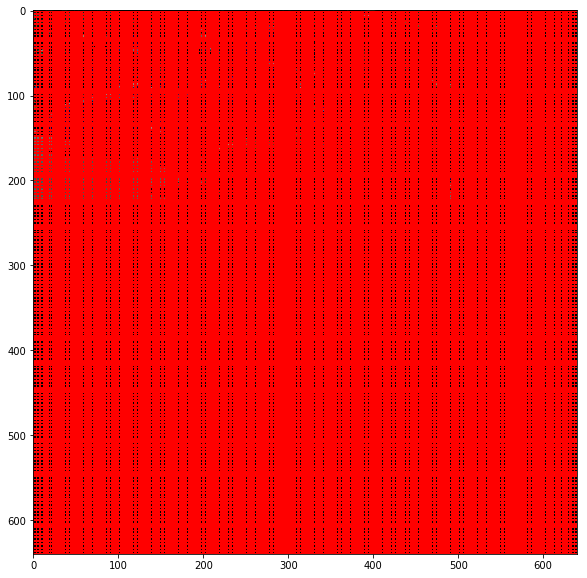

In [13]:
plot_anchor( batch_img[0], anchor_list)